Personal Wellbeing and Daily Habits: An In-Depth Analysis
Over the past year, I have meticulously collected data on several aspects of my daily life to better understand how my habits impact my overall wellbeing. The data includes:



*   **Sleep Duration:** The total hours of sleep I get each night.
*   **Screen Time:** The number of hours I spend on my phone throughout the day.
*   **Sleep Timing:** The hour I go to bed and the hour I wake up, tracking my sleep schedule consistency.
*   **Daily Happiness Score:** A subjective self-assessment of how happy or fulfilled I felt at the end of each day, based on a variety of personal factors and experiences.


This project aims to explore potential correlations between these daily habits and my self-reported happiness. The goal is to uncover insights that can inform healthier lifestyle choices and improve my wellbeing. Below are the results of my analysis, which provide a closer look at how these factors interact over time.

# Data Cleaning and preparation

In [274]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/Colab Notebooks/Casero/Nota/daily.csv'
df = pd.read_csv(file_path, encoding='latin-1',on_bad_lines='skip', sep=",")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
print(df.head())

        Dia Nota Good night Wake up Sleep time Calidad Screentime  Desbloq
0  1/2/2024  6,6       0:19    7:31       7:12     87%       6:25    202.0
1  2/2/2024  7,5       1:39    8:19       6:40     70%       5:19    254.0
2  3/2/2024  7,4       1:58    9:23       7:25     84%       6:00    193.0
3  4/2/2024  7,6      23:58    8:51       8:22     81%       5:35    221.0
4  5/2/2024  7,5       4:02    8:50       4:48     53%       3:42    223.0


In [277]:
df['Nota'] = df['Nota'].str.replace(',', '.', regex=False)
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')
df['Nota'].fillna(df['Nota'].mean(), inplace=True)

<ipython-input-277-06fcfb4eb77c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Nota'].fillna(df['Nota'].mean(), inplace=True)


In [278]:
# Clean data: Rename columns for easier handling
df.columns = ['Date', 'Happiness', 'GoodNight', 'WakeUp', 'SleepTime', 'Quality', 'ScreenTime', 'Unlocks']

# Convert necessary columns to numeric
numeric_columns = ['Happiness',  'Unlocks']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [279]:
df['SleepTime'] = df['SleepTime'].fillna('00:00')
df['ScreenTime'] = df['ScreenTime'].fillna('00:00')
df['GoodNight'] = df['GoodNight'].fillna('00:00')
df['WakeUp'] = df['WakeUp'].fillna('00:00')

df['SleepTime'] = df['SleepTime'].astype(str) + ':00'
df['ScreenTime'] = df['ScreenTime'].astype(str) + ':00'
df['GoodNight'] = df['GoodNight'].astype(str) + ':00'
df['WakeUp'] = df['WakeUp'].astype(str) + ':00'
df['SleepTime'] = pd.to_timedelta(df['SleepTime']).dt.total_seconds() / 3600
df['ScreenTime'] = pd.to_timedelta(df['ScreenTime']).dt.total_seconds() / 3600
df['GoodNight'] = pd.to_timedelta(df['GoodNight']).dt.total_seconds() / 3600
df['WakeUp'] = pd.to_timedelta(df['WakeUp']).dt.total_seconds() / 3600

# Parse dates
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [280]:
df['Quality'] = df['Quality'].str.replace('%', '', regex=False)
df['Quality'] = pd.to_numeric(df['Quality'], errors='coerce')

In [281]:
df = df.dropna(how='all')

In [282]:
df.describe()


Summary Statistics:
                      Date   Happiness   GoodNight      WakeUp   SleepTime  \
count                  288  289.000000  289.000000  289.000000  289.000000   
mean   2024-06-24 09:40:00    7.289583    2.958939    8.054902    6.461880   
min    2024-02-01 00:00:00    3.500000    0.000000    0.000000    0.000000   
25%    2024-04-13 18:00:00    6.500000    0.633333    7.366667    5.850000   
50%    2024-06-24 12:00:00    7.200000    1.333333    7.766667    6.700000   
75%    2024-09-04 06:00:00    8.000000    2.333333    8.716667    7.300000   
max    2024-11-15 00:00:00    9.950000   23.983333   14.000000    9.133333   
std                    NaN    1.105053    5.517320    1.531953    1.483014   

          Quality  ScreenTime     Unlocks  
count  288.000000  289.000000  288.000000  
mean    69.965278    5.038524  212.444444  
min      0.000000    0.000000  107.000000  
25%     61.000000    3.850000  173.000000  
50%     74.000000    4.800000  203.500000  
75%     83.0

# Analysis and Visualization

In [283]:
columns_for_correlation = ['Happiness', 'SleepTime', 'Quality', 'ScreenTime', 'Unlocks']
correlation_matrix = df[columns_for_correlation].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Happiness  SleepTime   Quality  ScreenTime   Unlocks
Happiness    1.000000  -0.145636 -0.160702   -0.135856  0.394898
SleepTime   -0.145636   1.000000  0.890083   -0.001963 -0.256404
Quality     -0.160702   0.890083  1.000000   -0.072551 -0.302876
ScreenTime  -0.135856  -0.001963 -0.072551    1.000000  0.121647
Unlocks      0.394898  -0.256404 -0.302876    0.121647  1.000000


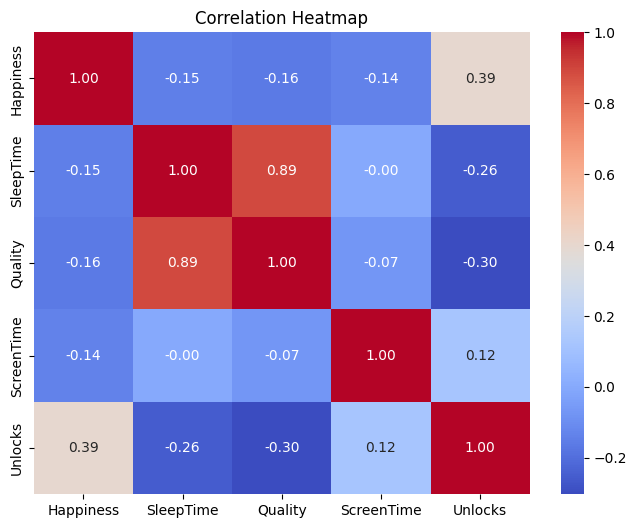

In [284]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

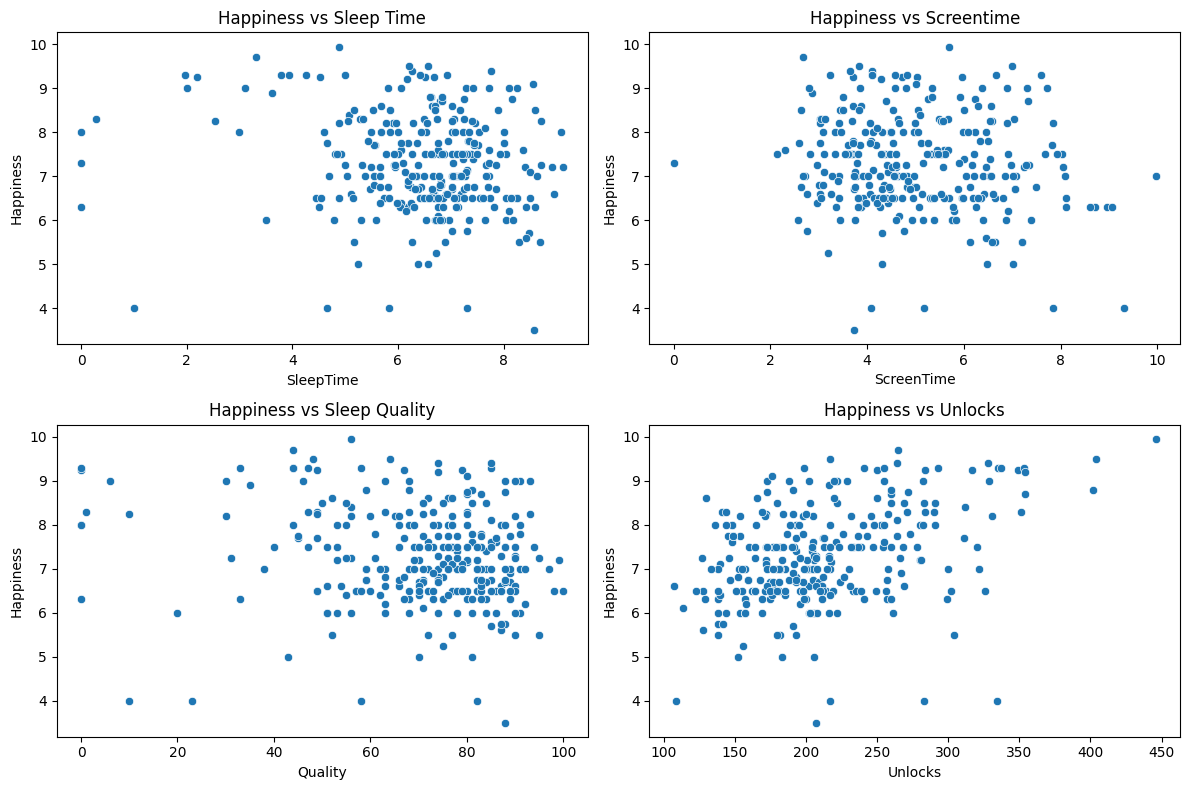

In [285]:
# Scatter plots for key relationships
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='SleepTime', y='Happiness')
plt.title("Happiness vs Sleep Time")

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='ScreenTime', y='Happiness')
plt.title("Happiness vs Screentime")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Quality', y='Happiness')
plt.title("Happiness vs Sleep Quality")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Unlocks', y='Happiness')
plt.title("Happiness vs Unlocks")

plt.tight_layout()
plt.show()

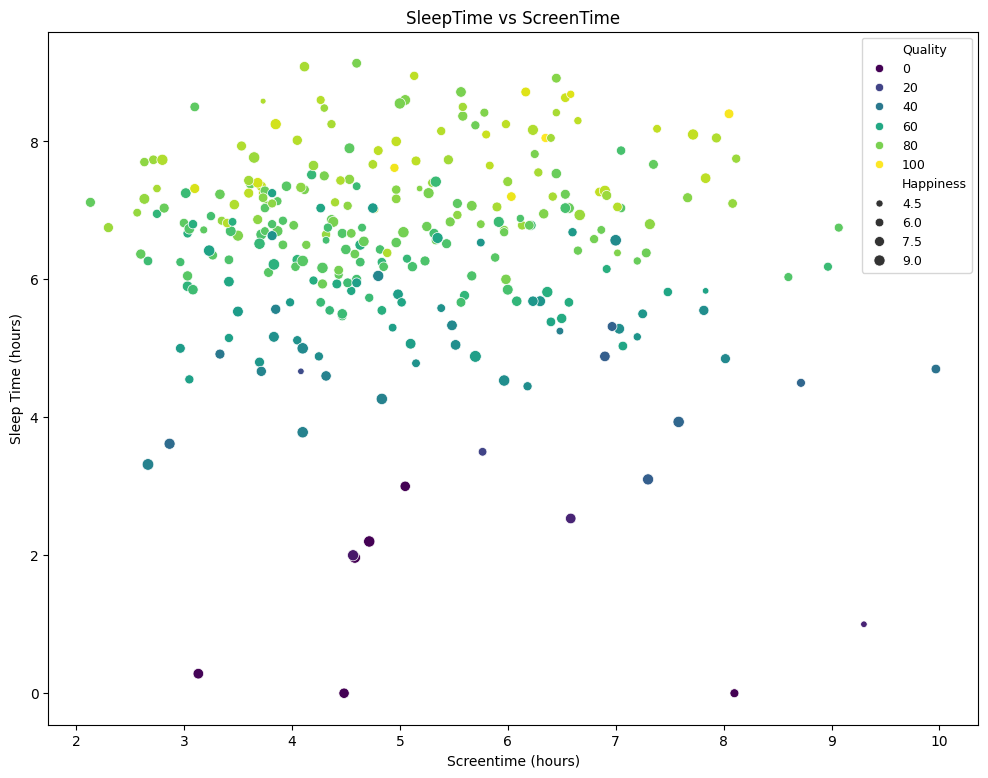

In [286]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, x='ScreenTime', y='SleepTime', hue='Quality', palette="viridis", size='Happiness')
plt.title("SleepTime vs ScreenTime")
plt.xlabel("Screentime (hours)")
plt.ylabel("Sleep Time (hours)")
plt.legend(loc='best', fontsize=9)
plt.show()

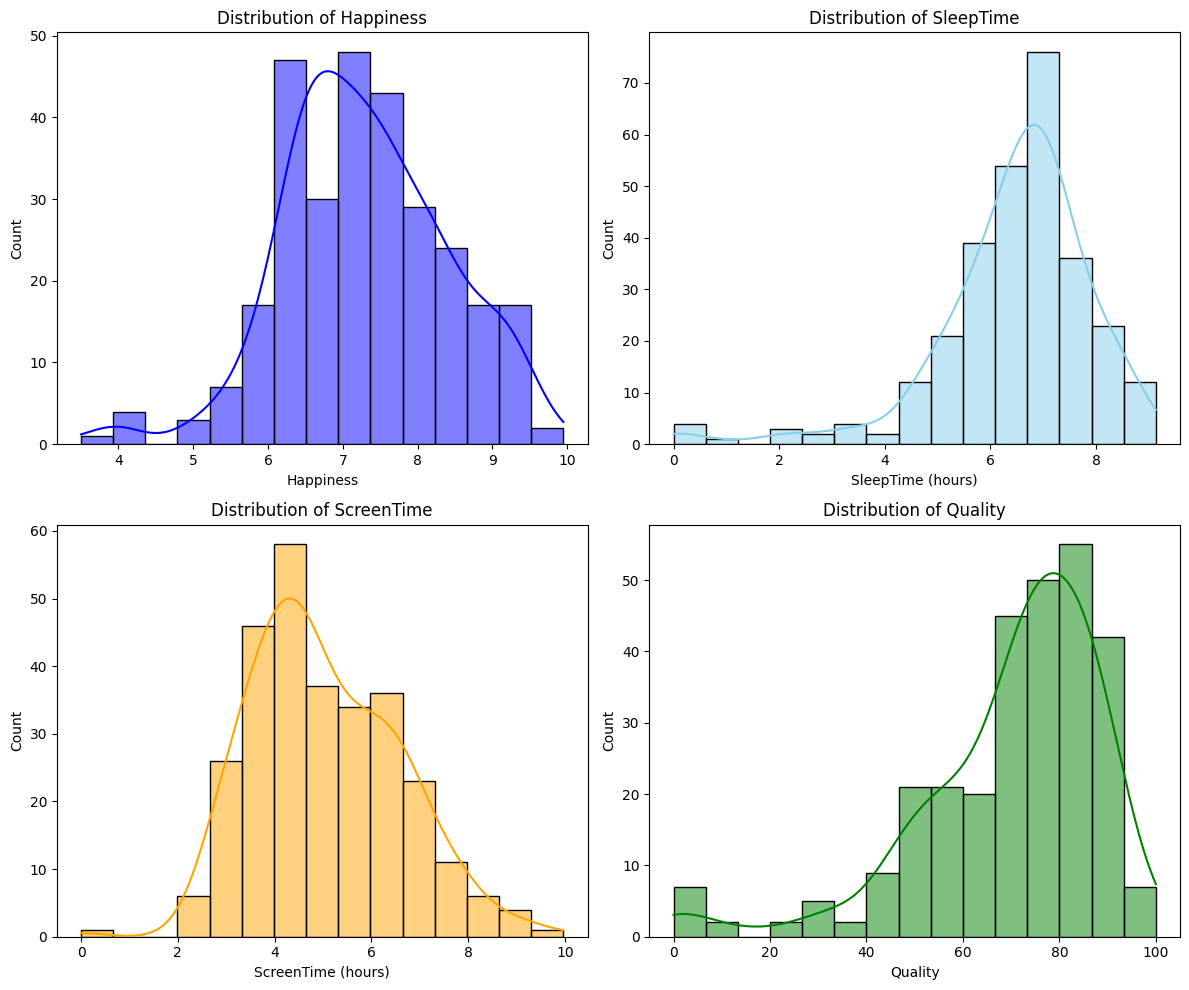

In [287]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

sns.histplot(df['Happiness'], kde=True, bins=15, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Happiness")
axes[0, 0].set_xlabel("Happiness")

sns.histplot(df['SleepTime'], kde=True, bins=15, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of SleepTime")
axes[0, 1].set_xlabel("SleepTime (hours)")

sns.histplot(df['ScreenTime'], kde=True, bins=15, color='orange', ax=axes[1, 0])
axes[1, 0].set_title("Distribution of ScreenTime")
axes[1, 0].set_xlabel("ScreenTime (hours)")

sns.histplot(df['Quality'], kde=True, bins=15, color='green', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Quality")
axes[1, 1].set_xlabel("Quality")

# Adjust layout
plt.tight_layout()
plt.show()

In [288]:
# Insights: Show days with the highest and lowest happiness
highest_happiness = df.nlargest(5, 'Happiness')
lowest_happiness = df.nsmallest(5, 'Happiness')

print("\nTop 5 Days with Highest Happiness:")
print(highest_happiness[['Date', 'Happiness', 'SleepTime', 'Quality', 'ScreenTime', 'Unlocks']])

print("\nTop 5 Days with Lowest Happiness:")
print(lowest_happiness[['Date', 'Happiness', 'SleepTime', 'Quality', 'ScreenTime', 'Unlocks']])


Top 5 Days with Highest Happiness:
          Date  Happiness  SleepTime  Quality  ScreenTime  Unlocks
74  2024-04-16       9.95   4.883333     56.0    5.700000    446.0
117 2024-05-29       9.70   3.316667     44.0    2.666667    265.0
75  2024-04-17       9.50   6.566667     48.0    7.000000    404.0
217 2024-09-06       9.50   6.216667     64.0    3.833333    217.0
141 2024-06-22       9.40   6.266667     74.0    4.100000    264.0

Top 5 Days with Lowest Happiness:
          Date  Happiness  SleepTime  Quality  ScreenTime  Unlocks
99  2024-05-11        3.5   8.583333     88.0    3.733333    207.0
10  2024-02-11        4.0   4.666667     23.0    4.083333    217.0
28  2024-03-01        4.0   1.000000     10.0    9.300000    334.0
198 2024-08-18        4.0   7.316667     82.0    5.183333    283.0
243 2024-10-02        4.0   5.833333     58.0    7.833333    109.0


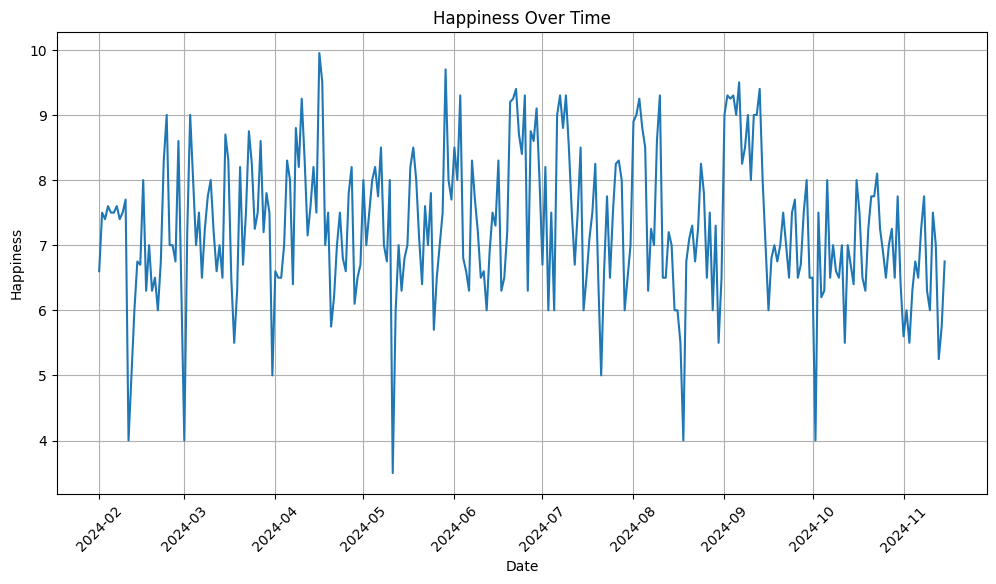

In [289]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Happiness'])
plt.title("Happiness Over Time")
plt.xlabel("Date")
plt.ylabel("Happiness")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

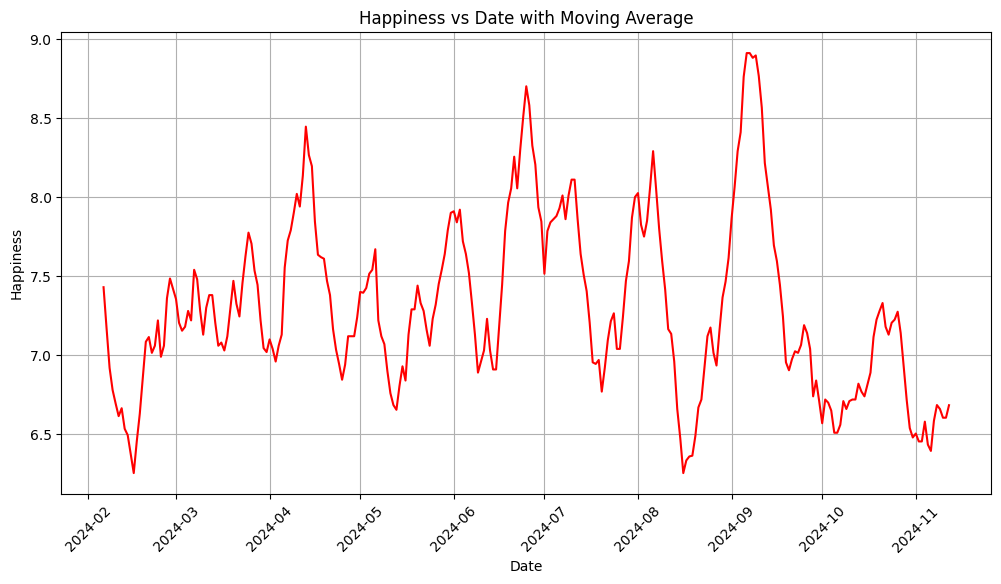

In [290]:
window_size = 10
df['Happiness_Rolling_Mean'] = df['Happiness'].rolling(window=window_size, center=True).mean()


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Happiness_Rolling_Mean'], label='Moving Average Happiness', color='red')
plt.title("Happiness vs Date with Moving Average")
plt.xlabel("Date")
plt.ylabel("Happiness")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

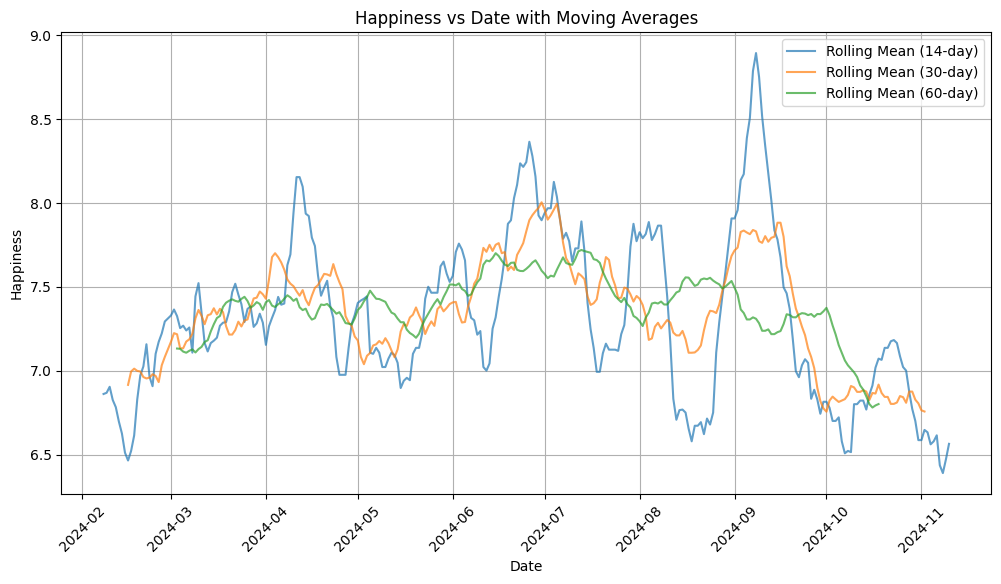

In [291]:
# List of window sizes for rolling means
window_sizes = [14, 30, 60]

# Calculate the rolling means for each window size
for size in window_sizes:
    df[f'Happiness_Rolling_Mean_{size}'] = df['Happiness'].rolling(window=size, center=True).mean()

plt.figure(figsize=(12, 6))

# Plot each rolling mean for the different window sizes
for size in window_sizes:
    plt.plot(df['Date'], df[f'Happiness_Rolling_Mean_{size}'], label=f'Rolling Mean ({size}-day)', alpha=0.7)

# Title and labels
plt.title("Happiness vs Date with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Happiness")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [304]:
daily_dfs = {}

for day in range(0, 7):
  daily_dfs[day] = df[df['Date'].dt.dayofweek+1 == day]

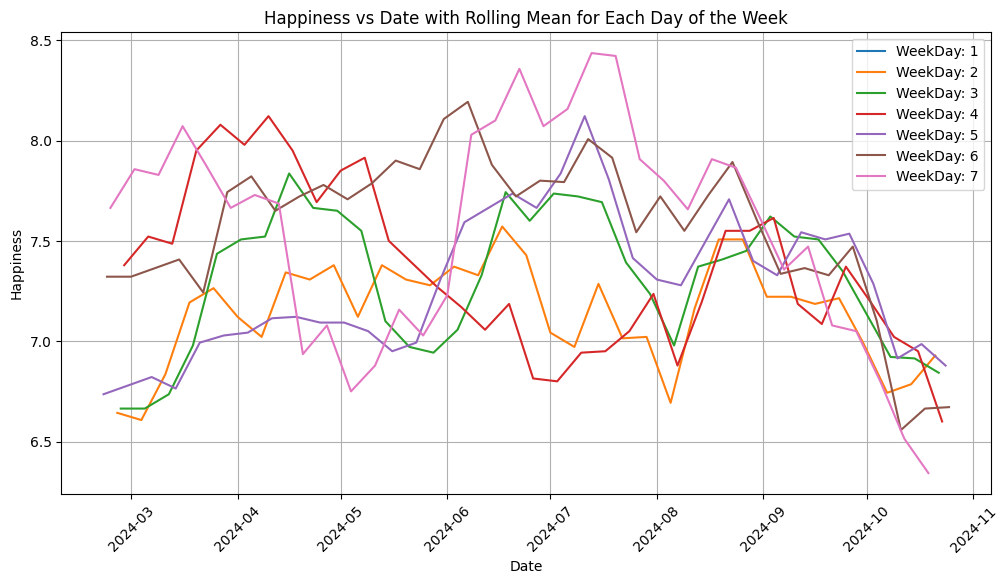

In [321]:
plt.figure(figsize=(12, 6))

for day in range(0, 7):
    rolling_happiness = daily_dfs[day]['Happiness'].rolling(window=7, center=True).mean()
    plt.plot(daily_dfs[day]['Date'], rolling_happiness, label=f'WeekDay: {day+1}', alpha=1)

plt.title("Happiness vs Date with Rolling Mean for Each Day of the Week")
plt.xlabel("Date")
plt.ylabel("Happiness")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

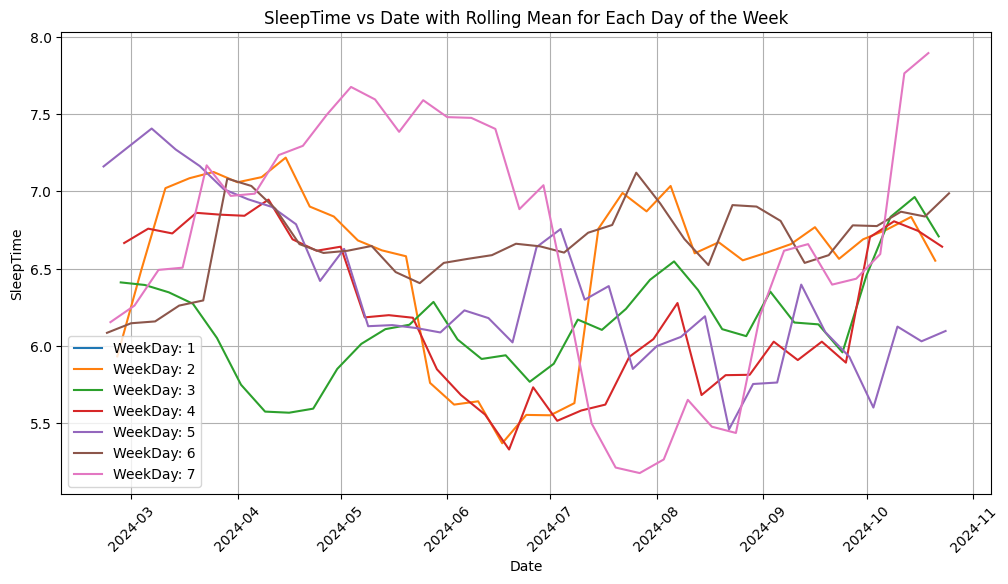

In [320]:
plt.figure(figsize=(12, 6))

for day in range(0, 7):
    rolling_happiness = daily_dfs[day]['SleepTime'].rolling(window=7, center=True).mean()
    plt.plot(daily_dfs[day]['Date'], rolling_happiness, label=f'WeekDay: {day+1}', alpha=1)

plt.title("SleepTime vs Date with Rolling Mean for Each Day of the Week")
plt.xlabel("Date")
plt.ylabel("SleepTime")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

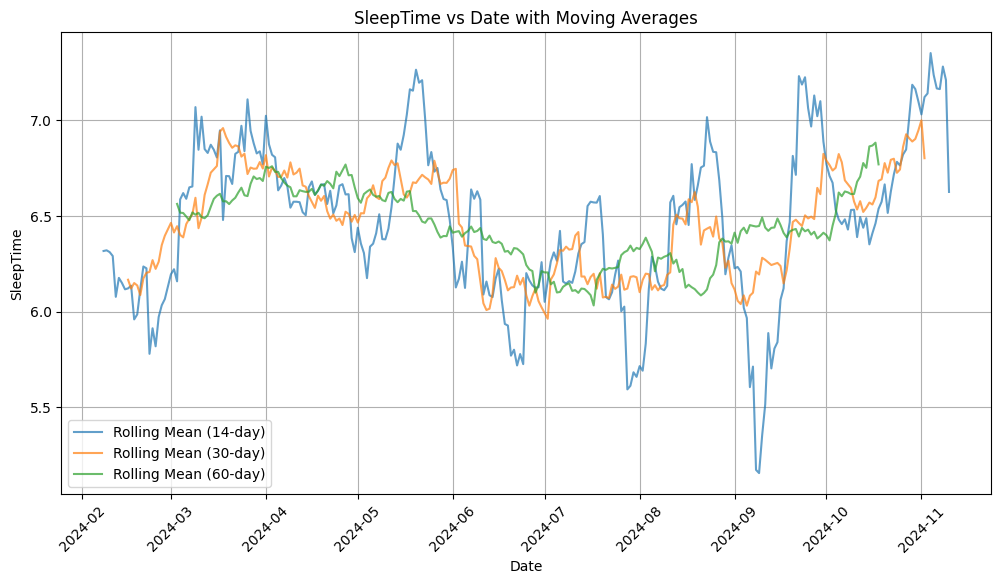

In [313]:
# List of window sizes for rolling means
window_sizes = [14, 30, 60]

# Calculate the rolling means for each window size
for size in window_sizes:
    df[f'SleepTime_Rolling_Mean_{size}'] = df['SleepTime'].rolling(window=size, center=True).mean()

plt.figure(figsize=(12, 6))

# Plot each rolling mean for the different window sizes
for size in window_sizes:
    plt.plot(df['Date'], df[f'SleepTime_Rolling_Mean_{size}'], label=f'Rolling Mean ({size}-day)', alpha=0.7)

# Title and labels
plt.title("SleepTime vs Date with Moving Averages")
plt.xlabel("Date")
plt.ylabel("SleepTime")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

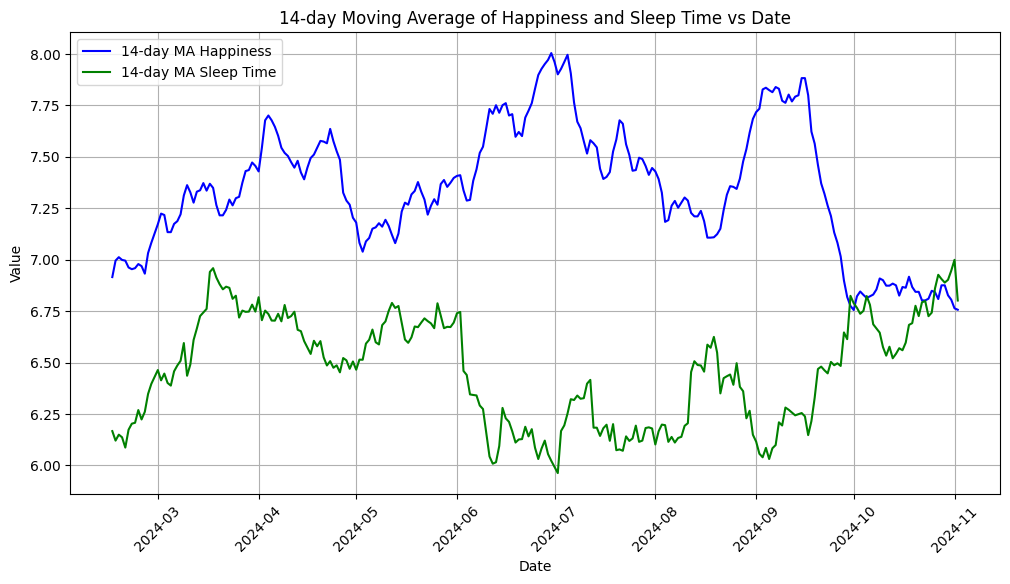

In [318]:
plt.figure(figsize=(12, 6))

window_size = 30
#moving average of Happiness
df['Happiness_14day_MA'] = df['Happiness'].rolling(window=window_size, center=True).mean()
plt.plot(df['Date'], df['Happiness_14day_MA'], label='14-day MA Happiness', color='blue')

#moving average of SleepTime
df['SleepTime_14day_MA'] = df['SleepTime'].rolling(window=window_size, center=True).mean()
plt.plot(df['Date'], df['SleepTime_14day_MA'], label='14-day MA Sleep Time', color='green')


plt.title('14-day Moving Average of Happiness and Sleep Time vs Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

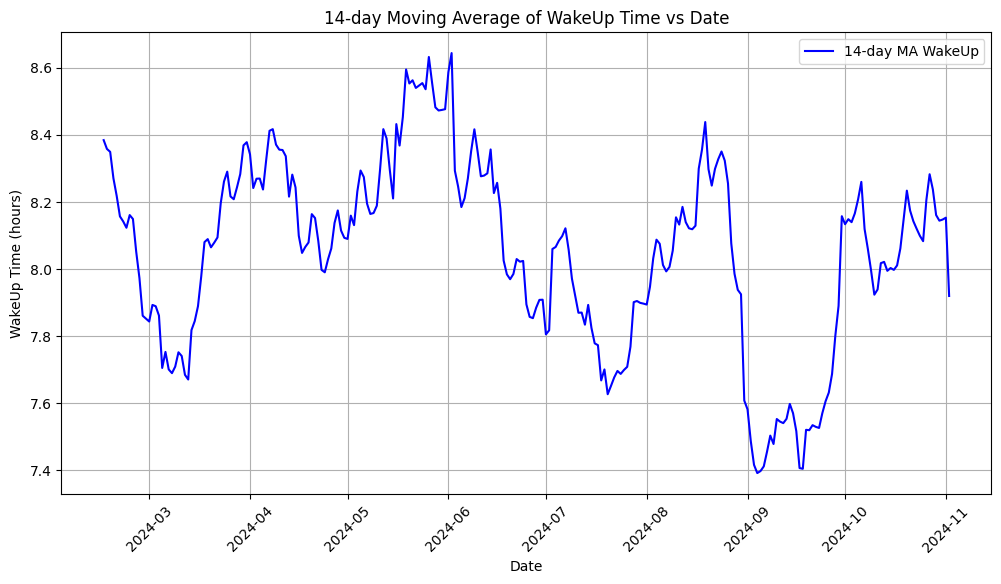

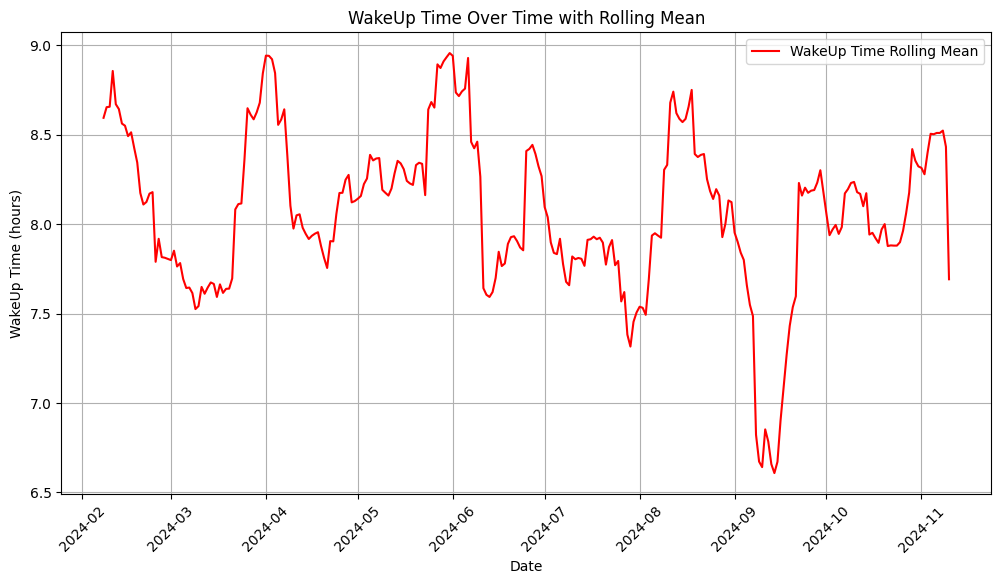

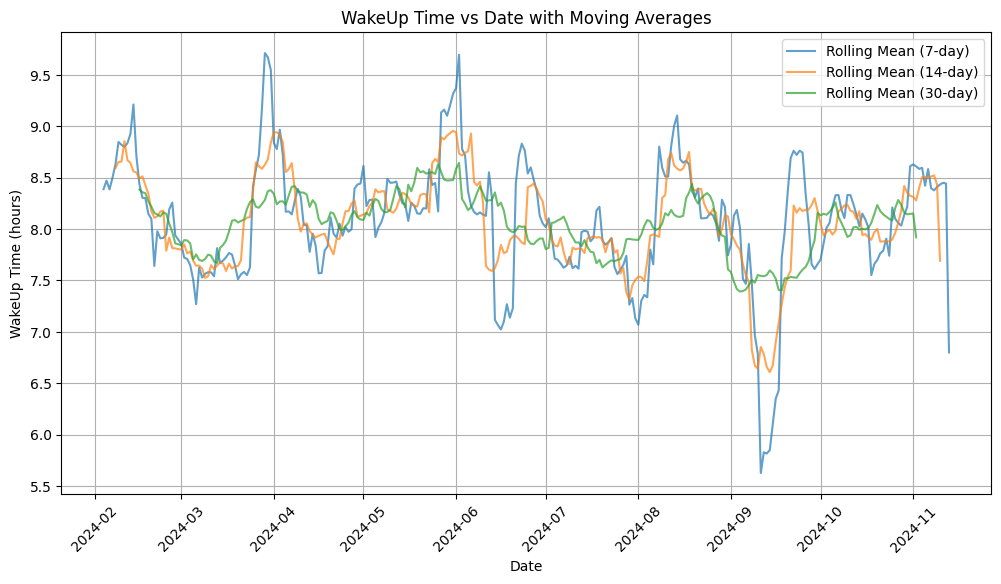

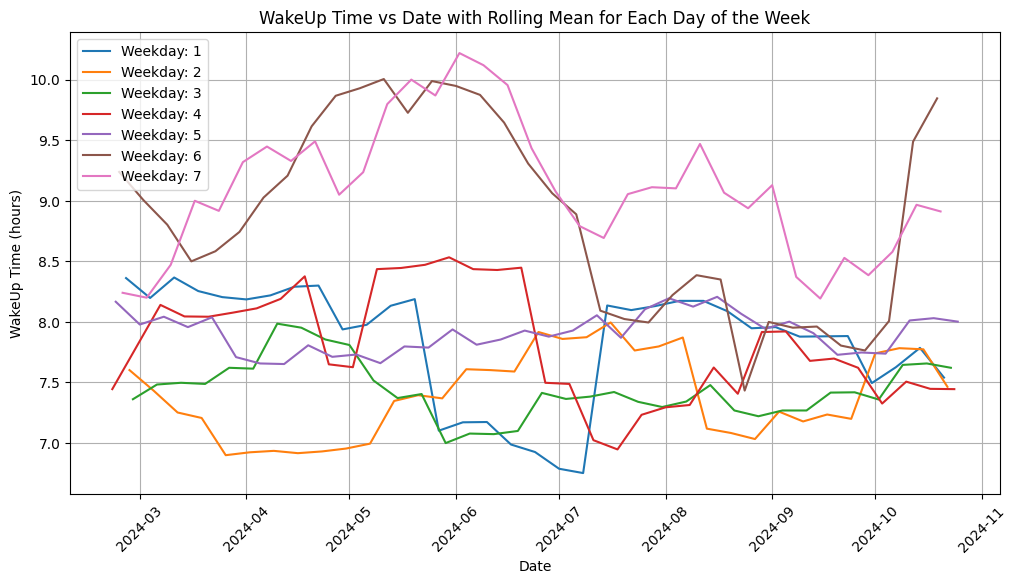

In [324]:
plt.figure(figsize=(12, 6))

window_size = 30
#moving average of WakeUp
df['WakeUp_14day_MA'] = df['WakeUp'].rolling(window=window_size, center=True).mean()
plt.plot(df['Date'], df['WakeUp_14day_MA'], label='14-day MA WakeUp', color='blue')


plt.title('14-day Moving Average of WakeUp Time vs Date')
plt.xlabel('Date')
plt.ylabel('WakeUp Time (hours)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Calculate the rolling mean for WakeUp with a specific window size
window_size = 14
df['WakeUp_Rolling_Mean'] = df['WakeUp'].rolling(window=window_size, center=True).mean()

# Plot the rolling mean of WakeUp time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['WakeUp_Rolling_Mean'], label='WakeUp Time Rolling Mean', color='red')
plt.title("WakeUp Time Over Time with Rolling Mean")
plt.xlabel("Date")
plt.ylabel("WakeUp Time (hours)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# List of window sizes for rolling means
window_sizes = [7, 14, 30]

# Calculate the rolling means for each window size for WakeUp
for size in window_sizes:
    df[f'WakeUp_Rolling_Mean_{size}'] = df['WakeUp'].rolling(window=size, center=True).mean()

plt.figure(figsize=(12, 6))

# Plot each rolling mean for the different window sizes for WakeUp
for size in window_sizes:
    plt.plot(df['Date'], df[f'WakeUp_Rolling_Mean_{size}'], label=f'Rolling Mean ({size}-day)', alpha=0.7)

# Title and labels
plt.title("WakeUp Time vs Date with Moving Averages")
plt.xlabel("Date")
plt.ylabel("WakeUp Time (hours)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# Analyze WakeUp time trends for each day of the week
daily_dfs = {}
for day in range(0, 7):
    daily_dfs[day] = df[df['Date'].dt.dayofweek == day]

plt.figure(figsize=(12, 6))

for day in range(0, 7):
    rolling_wakeup = daily_dfs[day]['WakeUp'].rolling(window=7, center=True).mean()
    plt.plot(daily_dfs[day]['Date'], rolling_wakeup, label=f'Weekday: {day + 1}', alpha=1)

plt.title("WakeUp Time vs Date with Rolling Mean for Each Day of the Week")
plt.xlabel("Date")
plt.ylabel("WakeUp Time (hours)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()
